In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('googleplaystore.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [111]:
df.shape

(10841, 13)

In [112]:
df.info

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

In [18]:
#check null values 
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [19]:
#drop records with null in column Rating
df.dropna(subset=['Content Rating'],axis=0,inplace=True)

In [20]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [21]:
#4.1/ extract the numeric value from Size column
df['Size'] = df['Size'].str.extract('(\d+\.?\d*)').astype(float)

In [22]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [23]:
#from size Mb to Kb
df['Size']=df['Size']*1000

In [24]:
df['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10836    53000.0
10837     3600.0
10838     9500.0
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [25]:
#Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
df.Reviews=df.Reviews.astype("int32")

In [26]:
df.Reviews.describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [27]:
#Installs field is currently stored as string and has values like 1,000,000+.remove'+'
df['Installs']=df['Installs'].apply(lambda x: x.replace('+','').replace(',',''))


In [28]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: object

In [29]:
#Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
df['Price'] = df['Price'].apply((lambda x:str(x).replace('$','') if '$' in str(x) else str(x)))
df['Price'] = df['Price'].apply (lambda x: float(x))
df['Price'].dtype

dtype('float64')

In [30]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [31]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10840, dtype: float64

In [32]:
#sanity check
1.
df[(df["Rating"]<1) | (df["Rating"]>5)]
df = df.drop(df[(df["Rating"]<1) | (df["Rating"]>5)].index)

In [33]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10840, dtype: float64

In [51]:
#Reviews should not be more than installs as only those who installed can review the app.
df[df['Reviews'] > df['Installs']]
df.drop(df[df['Reviews'] > df['Installs']].index, inplace = True)

In [52]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39M,"5,000,000+",Free,0,Everyone,Art & Design,"August 3, 2018",2.2.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,List iptv FR,VIDEO_PLAYERS,NaN,1,2.9M,100+,Free,0,Everyone,Video Players & Editors,"April 22, 2018",1.0,4.0.3 and up
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,"June 13, 2018",2.0.20,4.0.3 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [36]:
#For free apps (type = “Free”), the price should not be >0. Drop any such rows.

df[(df['Type']=='free')& (df['Price'] ==0)].shape[0]

0

In [68]:
#Performing univariate analysis: 
#box plot for price
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
sns.set(rc={'figure.figsize':(10,6)})

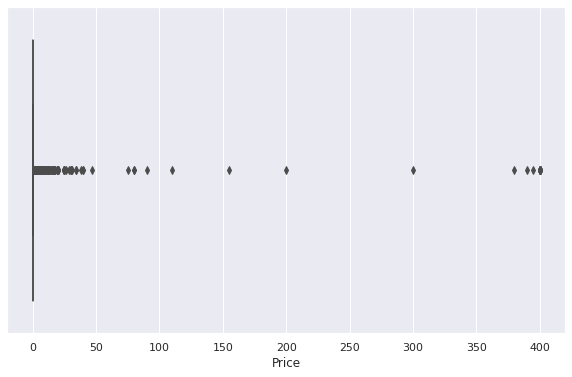

In [153]:
sns.boxplot(x= 'Price',data= df);

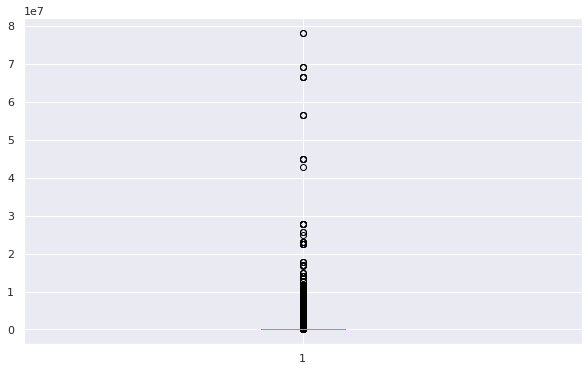

In [154]:
plt.boxplot(df['Reviews'])
plt.show()

(array([  17.,   18.,   41.,   74.,  137.,  446.,  879., 1662., 4175.,
        1917.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

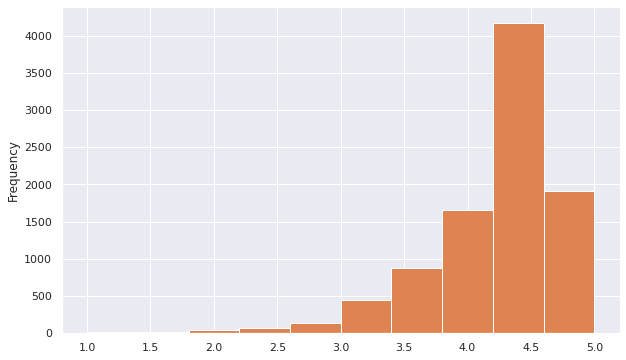

In [155]:
# Histogram for Rating
sns.set(rc={'figure.figsize':(10,6)})
df['Rating'].plot(kind= 'hist'); #we can use either to get the results
plt.hist(df['Rating'])

(array([8879.,   38.,   37.,   32.,   28.,   27.,   25.,   25.,   27.,
          27.]),
 array([1.000e+03, 1.029e+05, 2.048e+05, 3.067e+05, 4.086e+05, 5.105e+05,
        6.124e+05, 7.143e+05, 8.162e+05, 9.181e+05, 1.020e+06]),
 <BarContainer object of 10 artists>)

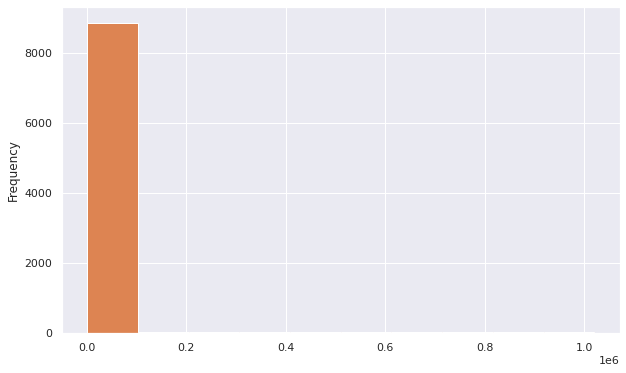

In [156]:
# Histogram for Size
sns.set(rc={'figure.figsize':(10,6)})
df['Size'].plot(kind= 'hist') #we can use either to get the results
plt.hist(df['Size'])

In [21]:
df['Price'].nunique()

93

In [22]:
df['Price'].unique()

array(['0  ', '$4.99  ', '$3.99  ', '$6.99  ', '$1.49  ', '$2.99  ',
       '$7.99  ', '$5.99  ', '$3.49  ', '$1.99  ', '$9.99  ', '$7.49  ',
       '$0.99  ', '$9.00  ', '$5.49  ', '$10.00  ', '$24.99  ',
       '$11.99  ', '$79.99  ', '$16.99  ', '$14.99  ', '$1.00  ',
       '$29.99  ', '$12.99  ', '$2.49  ', '$10.99  ', '$1.50  ',
       '$19.99  ', '$15.99  ', '$33.99  ', '$74.99  ', '$39.99  ',
       '$3.95  ', '$4.49  ', '$1.70  ', '$8.99  ', '$2.00  ', '$3.88  ',
       '$25.99  ', '$399.99  ', '$17.99  ', '$400.00  ', '$3.02  ',
       '$1.76  ', '$4.84  ', '$4.77  ', '$1.61  ', '$2.50  ', '$1.59  ',
       '$6.49  ', '$1.29  ', '$5.00  ', '$13.99  ', '$299.99  ',
       '$379.99  ', '$37.99  ', '$18.99  ', '$389.99  ', '$19.90  ',
       '$8.49  ', '$1.75  ', '$14.00  ', '$4.85  ', '$46.99  ',
       '$109.99  ', '$154.99  ', '$3.08  ', '$2.59  ', '$4.80  ',
       '$1.96  ', '$19.40  ', '$3.90  ', '$4.59  ', '$15.46  ', '$3.04  ',
       '$4.29  ', '$2.60  ', '$3.28  ', '$4

In [34]:
df['Price']=df['Price'].replace({'$':' '},regex=True)

In [35]:
df['Price']

0        0      
1        0      
2        0      
3        0      
4        0      
          ...   
10836    0      
10837    0      
10838    0      
10839    0      
10840    0      
Name: Price, Length: 10841, dtype: object

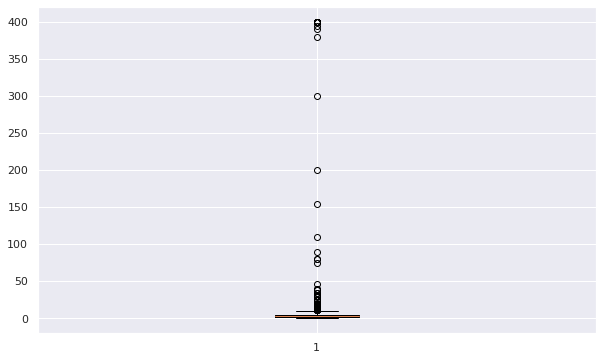

In [70]:
import matplotlib.pyplot as plt
plt.boxplot(df["Price"])
plt.show()

In [47]:
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10841, dtype: object

In [76]:
#I) price of $200 and above for an application is expected to be very high
df[df['Price']>200].index.shape[0] #we can use either to get the results
df.loc[df['Price']>200].shape[0]

17

In [77]:
#Dropping the Junk apps
df.drop(df[df['Price']>200].index, inplace= True)

In [78]:
df.shape

(782, 13)

In [157]:
#II) Very few apps have very high no. of Reviews
df.loc[df['Reviews']>2000000].shape[0]

453

In [158]:
df[df.Reviews>2000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,NaN,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


In [159]:
df=df[df.Reviews<=2000000].copy()

In [160]:
df.shape

(10387, 13)

In [161]:
#dropping high installed app
df.quantile([0.1,0.25,0.5,0.7,0.9,0.95,0.99], axis=0)

,Rating,Reviews,Size,Price
0.10,3.5,2.00,2900.0,0.00
0.25,4.0,31.50,5500.0,0.00
0.50,4.3,1533.00,14000.0,0.00
0.70,4.5,23014.80,27000.0,0.00
0.90,4.7,246404.20,61000.0,0.00
0.95,4.8,546119.10,89000.0,1.99
0.99,5.0,1376777.04,672750.0,9.99


In [111]:
#dropping the value more than the cutoff(threshold -95th percentile)
df.drop(df[df['Installs']>10000000].index, inplace= True)

TypeError: '>' not supported between instances of 'str' and 'int'

In [163]:
df.shape

(10387, 13)

<AxesSubplot: xlabel='Rating', ylabel='Price'>

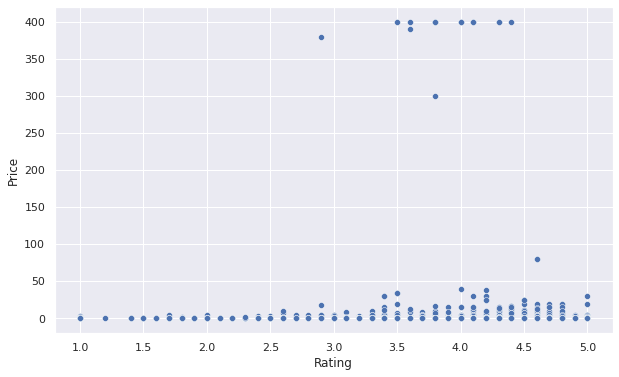

In [165]:
sns.scatterplot(x = 'Rating', y = 'Price',data=df)

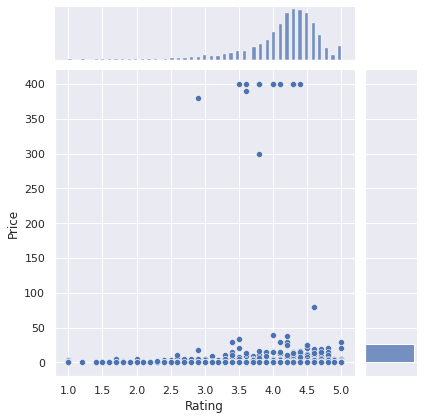

In [166]:
sns.jointplot(x= 'Rating',y= 'Price',data= df)

<AxesSubplot: xlabel='Rating', ylabel='Size'>

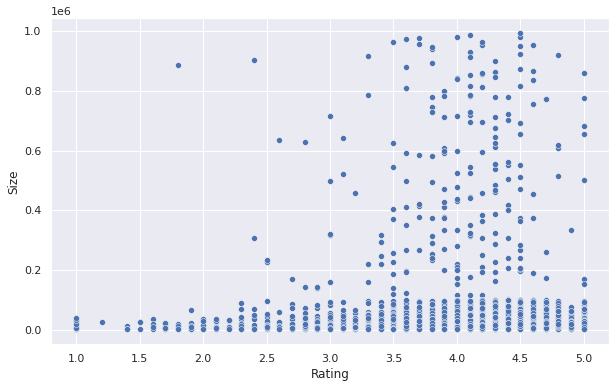

In [167]:
#2) Scatterplot/jointplot for Rating Vs. Size
sns.scatterplot(x= 'Rating',y= 'Size', data= df)

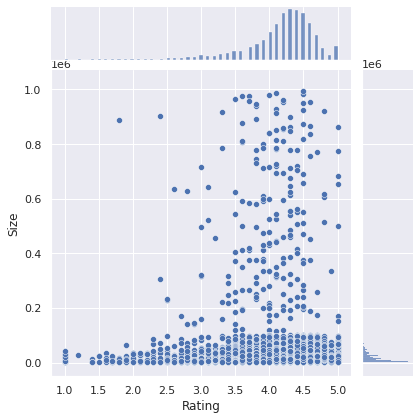

In [168]:
sns.jointplot(x= 'Rating', y= 'Size', data= df)

<AxesSubplot: xlabel='Rating', ylabel='Reviews'>

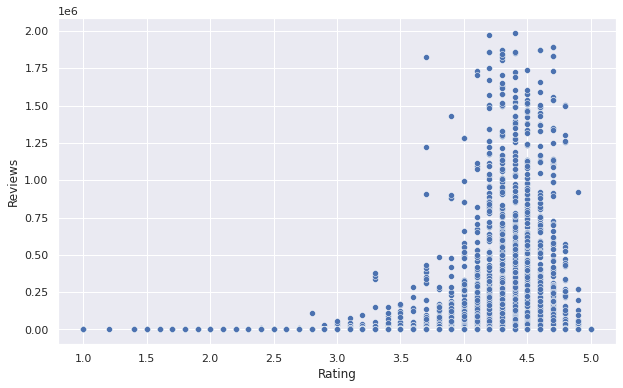

In [169]:
#3) Scatterplot for Ratings Vs. Reviews
sns.scatterplot(x= 'Rating',y= 'Reviews', data= df)

<AxesSubplot: xlabel='Rating', ylabel='Content Rating'>

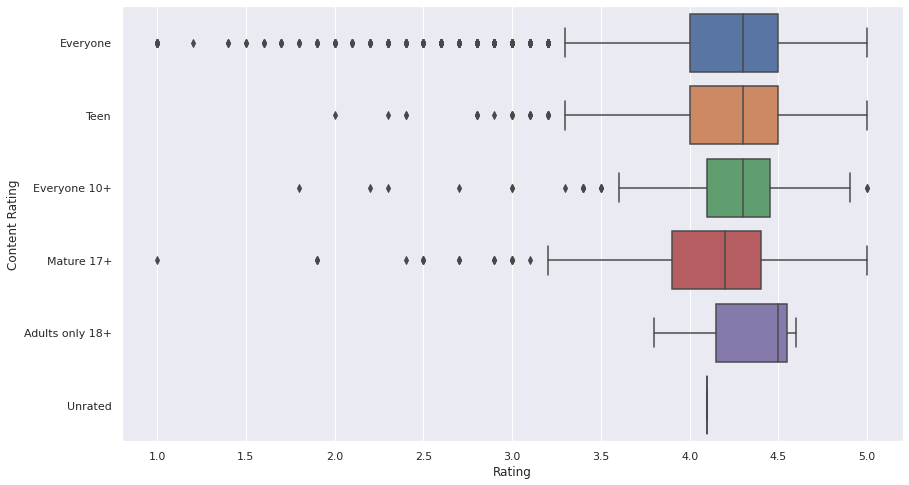

In [170]:
#4) Boxplot for Ratings Vs. Content Rating
sns.set(rc={'figure.figsize':(14,8)})
sns.boxplot(x= 'Rating', y= 'Content Rating', data = df)

<AxesSubplot: xlabel='Rating', ylabel='Category'>

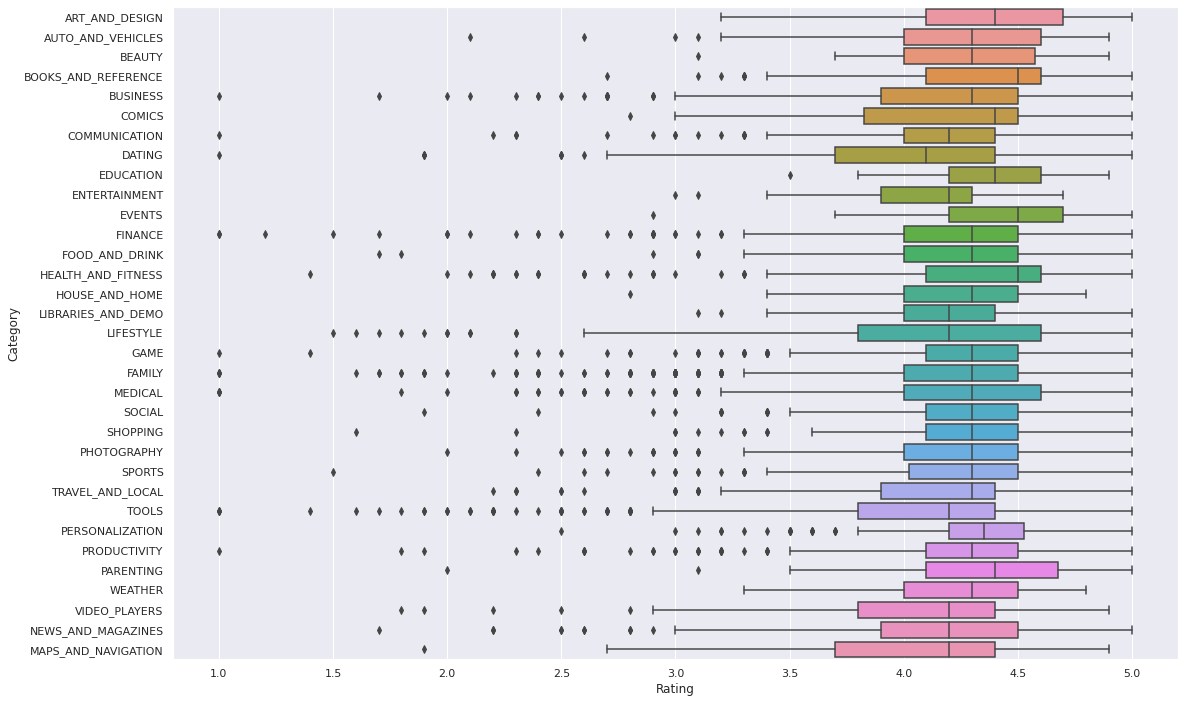

In [171]:
#5) Boxplot for Ratings Vs. Category
sns.set(rc={'figure.figsize':(18,12)})
sns.boxplot(x= 'Rating', y = 'Category', data= df)

In [58]:
#8. Data Preprocessing
inp1=df.copy()

In [59]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [112]:
inp1['Size'] = inp1['Size'].str.extract('(\d+\.?\d*)').astype(float)

In [40]:
inp1['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10836    53000.0
10837     3600.0
10838     9500.0
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [115]:
inp1.Reviews=inp1.Reviews.astype("float")

ValueError: could not convert string to float: '3.0M'

In [10]:
inp1.Reviews.describe()

count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

In [11]:
inp1['Installs']=inp1['Installs'].apply(lambda x: x.replace('+','').replace(',',''))

In [12]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [42]:
inp1.skew()

/tmp/ipykernel_70/3545313420.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inp1.skew()


Rating      -1.849695
Reviews     16.449584
Size         6.848021
Installs     9.572067
Price       23.707392
dtype: float64

In [43]:
inp1['Reviews']=np.log(inp1['Reviews'])

/usr/local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [62]:
inp1['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10841, dtype: object

In [114]:
inp1['Installs']=np.log(inp1['Installs'])

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method

In [46]:
inp1['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: object

In [49]:
#2) Dropping the columns- App, Last Updated, Current Ver, Type, & Andriod Ver as these won't be useful for our model
inp1.drop(['Last Updated','Current Ver','Android Ver','App'], axis=1, inplace= True)
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity


In [50]:
inp1.shape

(10841, 9)

In [60]:
#3) create a copy of dataframe
inp2 = inp1

In [61]:
inp2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
#get unique values in column category
inp2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [63]:
inp2.Category = pd.Categorical(inp2.Category)

x = inp2[['Category']]
del inp2['Category']

dummies = pd.get_dummies(x, prefix = 'Category')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,0


In [64]:
#get unique values in Column Genres
inp2["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [66]:
#Create an empty list
lists = []
#Get the total genres count and gernes count of perticular gerner count less than 20 append those into the list
for i in inp2.Genres.value_counts().index:
    if inp2.Genres.value_counts()[i]<20:
        lists.append(i)
#changing the gerners which are in the list to other
inp2.Genres = ['Other' if i in lists else i for i in inp2.Genres]

In [67]:
inp2["Genres"].unique()

array(['Art & Design', 'Other', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education;Education', 'Education',
       'Education;Pretend Play', 'Entertainment',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Arcade', 'Casual', 'Card', 'Casual;Pretend Play',
       'Action', 'Strategy', 'Puzzle', 'Sports', 'Music', 'Word',
       'Racing', 'Casual;Action & Adventure', 'Simulation', 'Adventure',
       'Board', 'Trivia', 'Role Playing', 'Educational;Education',
       'Racing;Action & Adventure', 'Medical', 'Social', 'Shopping',
       'Photography', 'Travel & Local', 'Tools', 'Personalization',
       'Productivity', 'Parenting', 'Weather', 'Video Players & Editors',
       'News & Magazines', 'Maps & Navigation', 'Educational', 'Casino'],
      dtype=object)

In [68]:
#Storing the genres column into x varible and delete the genres col from dataframe inp2
#And concat the encoded cols to the dataframe inp2
inp2.Genres = pd.Categorical(inp2['Genres'])
x = inp2[["Genres"]]
del inp2['Genres']
dummies = pd.get_dummies(x, prefix = 'Genres')
inp2 = pd.concat([inp2,dummies], axis=1)

In [69]:
inp2.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,...,Genres_Simulation,Genres_Social,Genres_Sports,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#getting the unique values in Column "Content Rating"
inp2["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [74]:
#Applying one hot encoding 
#Storing the Content Rating column into x varible and delete the Content Rating col from dataframe inp2
#And concat the encoded cols to the dataframe inp2
inp2['Content Rating'] = pd.Categorical(inp2['Content Rating'])

x = inp2[['Content Rating']]
del inp2['Content Rating']

dummies = pd.get_dummies(x, prefix = 'Content Rating')
inp2 = pd.concat([inp2,dummies], axis=1)
inp2.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Current Ver,Android Ver,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,"January 7, 2018",1.0.0,4.0.3 and up,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,"January 15, 2018",2.0.0,4.0.3 and up,...,0,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,"August 1, 2018",1.2.4,4.0.3 and up,...,0,0,0,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,"June 8, 2018",Varies with device,4.2 and up,...,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,"June 20, 2018",1.1,4.4 and up,...,0,0,0,0,0,1,0,0,0,0


In [75]:
inp2.shape

(10841, 105)

In [77]:
#9.
from sklearn.model_selection import train_test_split

In [78]:
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 100)

In [79]:
df_train.shape, df_test.shape

((7588, 105), (3253, 105))

In [80]:
#10 separate the dataframes into X_train, y_train, X_test, and y_test.
y_train = df_train.pop("Rating")
X_train = df_train

In [81]:
y_test = df_test.pop("Rating")
X_test = df_test

In [ ]:
#11.Model building

In [100]:
extract the numeric value from Size column
inp2['Size'] = inp2['Size'].str.extract('(\d+\.?\d*)').astype(float)

In [101]:
inp2['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float64

In [103]:
#from size Mb to Kb
inp2['Size']=inp2['Size']*1000

In [104]:
inp2

,App,Rating,Reviews,Size,Installs,Type,Price,Last Updated,Current Ver,Android Ver,...,Genres_Trivia,Genres_Video Players & Editors,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000000.0,"10,000+",Free,0,"January 7, 2018",1.0.0,4.0.3 and up,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,967,14000000.0,"500,000+",Free,0,"January 15, 2018",2.0.0,4.0.3 and up,...,0,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8700000.0,"5,000,000+",Free,0,"August 1, 2018",1.2.4,4.0.3 and up,...,0,0,0,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25000000.0,"50,000,000+",Free,0,"June 8, 2018",Varies with device,4.2 and up,...,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2800000.0,"100,000+",Free,0,"June 20, 2018",1.1,4.4 and up,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,4.5,38,53000000.0,"5,000+",Free,0,"July 25, 2017",1.48,4.1 and up,...,0,0,0,0,0,1,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,3600000.0,100+,Free,0,"July 6, 2018",1.0,4.1 and up,...,0,0,0,0,0,1,0,0,0,0
10838,Parkinson Exercices FR,NaN,3,9500000.0,"1,000+",Free,0,"January 20, 2017",1.0,2.2 and up,...,0,0,0,0,0,1,0,0,0,0
10839,The SCP Foundation DB fr nn5n,4.5,114,NaN,"1,000+",Free,0,"January 19, 2015",Varies with device,Varies with device,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#Model building 
#1
from sklearn.linear_model import LinearRegression

Lr = LinearRegression()

Lr.fit(Train_x,Train_y)

NameError: name 'Train_x' is not defined

In [5]:
predicted = Lr.predict(Test_x)

NameError: name 'Test_x' is not defined

In [6]:
from sklearn import metrics
print(metrics.accuracy_score(predicted,Test_y))

NameError: name 'predicted' is not defined

In [ ]:
#2 R2
Report the R2 on the train set

from sklearn.metrics import r2_score

y_train_pred= lr.predict(X_train)

r2_score(y_train, y_train_pred)

In [ ]:
12.Make predictions on test set and report R2.

y_test_pred= lr.predict(X_test)

r2_score(y_test, y_test_pred)